# A8: Integrals and data

I used the A7 template, since that had the info on loading csv files...

In [35]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import interpolate # Interpolartion module
from scipy import integrate # Integration module
import matplotlib.pyplot as plt
from io import StringIO

# Q9

## Importing from data files

Download a CSV file containing the temperature-dependent heat capacity of ammonia gas from http://hdl.handle.net/10066/17736. Load the file into Python by pulling the data from the url using

```python
df2 = pd.read_csv("https://scholarship.tricolib.brynmawr.edu/bitstream/handle/10066/17736/AmmoniaHeatCapacity.csv?sequence=1&isAllowed=y")
df2
```

In a new cell, save the temperature and Cp to numpy arrays:

```python
T = df2['T/K'].values
Cp = df2['Cp/J/K/mol'].values
```

In [36]:
df = pd.read_csv('/Users/dwyer/Downloads/Al-cP-vs-T-22.csv')
df

,T_K,cP_J/g-K
0,0.108,0.000001
1,0.228,0.000003
2,0.447,0.000006
3,1.170,0.000015
4,2.630,0.000036
...,...,...
72,284.010,0.890942
73,289.650,0.900716
74,295.400,0.901802
75,295.940,0.899940


In [37]:
T = df['T_K'].values
cp = df['cP_J/g-K'].values
Cp = cp*26.98 # Molar mass of Al

Text(0, 0.5, ' Molar heat capacity $\\bar{C}_P$ (J/mol-K)')

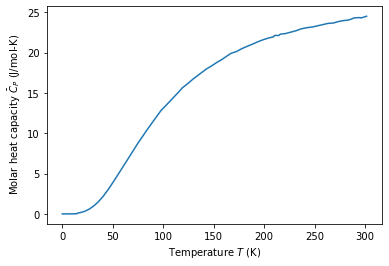

In [38]:
plt.plot(T, Cp)
plt.xlabel("Temperature $T$ (K)")
plt.ylabel(" Molar heat capacity $\\bar{C}_P$ (J/mol-K)")

Text(0, 0.5, ' Molar heat capacity $\\bar{C}_P/R$ ')

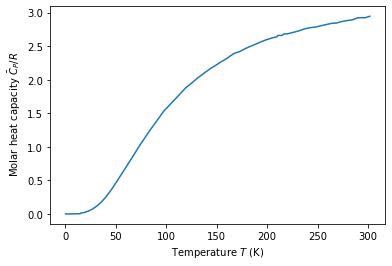

In [50]:
plt.plot(T, Cp/8.3145)
plt.xlabel("Temperature $T$ (K)")
plt.ylabel(" Molar heat capacity $\\bar{C}_P/R$ ")

In [39]:
# You should define something like 
# Cp_interpolated = interpolate.interp1d
# Remember to Shift+Tab to look up the help
Cp_interpolated = interpolate.interp1d(T, Cp)

### Numerical integration in Python

To do an integral of a function $f$ from `a` to `b`, use `integrate.quad`. The help is

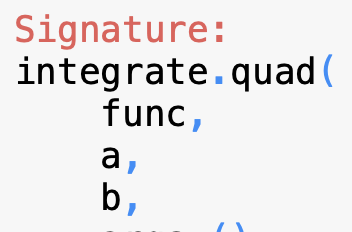

so you give the function, then the lower bound `a`, then the upper bound `b` as the arguments. The outputs of the function are the value of the integral and an estimated error.

### Integrating the heat capacity to determine $\Delta H$

$$\newcommand{\st}[1]{_{\text{#1}}}$$


Use the constant pressure heat capacity of ammonia (the data and interpolating function above) to determine $\Delta H$ when 1 mol of ammonia is warmed from 300 K to 500 K. At constant pressure,
    $$
    C_P(T) = \frac{dH}{dT}
    $$
    You should be able to use algebra and then integrate both sides to determine
    $$\begin{align*}
    \int_{T\st{i}}^{T\st{f}} C_P(T)\,dT& = \int_{\text{initial}}^{\text{final}} dH\\
    \int_{T\st{i}}^{T\st{f}} C_P(T)\,dT& = \Delta H
    \end{align*}
    $$
    
Since there is no data point at 0 K, we have to start the integral a bit higher.


In [48]:
deltaH = integrate.quad(Cp_interpolated, 0.1, 298) 
deltaH

/var/folders/9j/cpbbgchx5r5_gsh1n6yplhpr0000gn/T/ipykernel_16248/2540398217.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  deltaH = integrate.quad(Cp_interpolated, 0.1, 298)


(4564.223013534931, 0.24236339937033335)

Similarly, at constant pressure, no non-mechanical work, we can reversibly increase temperature (slowing increasing $T_\text{surr}$ so $T=T_\text{surr}$ throughout) and the heat flow is

$$
\partial q_\text{rev} = C_p dT
$$

Then we use the definition of entropy to find

$$
dS = \frac{\partial q_\text{rev}}{T}
$$

Integrating both sides, we have

$$
\Delta S = \int_{T_\text{i}}^{T_\text{f}}  \frac{ C_p dT}{T}
$$


In [49]:
deltaS = integrate.quad(lambda T: Cp_interpolated(T)/T, 0.11, 298)
deltaS

/var/folders/9j/cpbbgchx5r5_gsh1n6yplhpr0000gn/T/ipykernel_16248/4535974.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  deltaS = integrate.quad(lambda T: Cp_interpolated(T)/T, 0.11, 298)


(28.340690875781906, 0.006374039813454857)

This answer, 28.34 J/mol-K, matches closely with the number in the thermodynamic data table (28.32 J/mol-K). This is how they obtained that number!

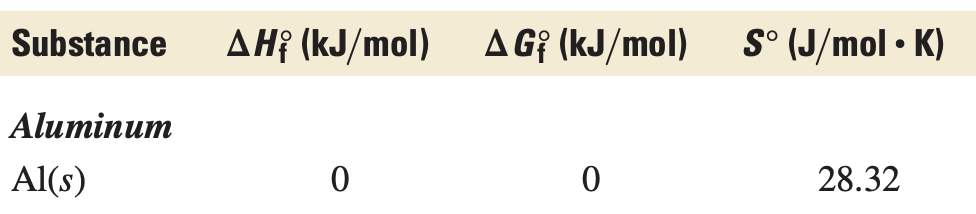

### 10

a)

In [58]:
def cPSO2_R(T):
    return 7.781 - 1454.6/T + 160351/T**2

def cPSO2(T):
    return cPSO2_R(T)*8.3145 # Normal heat capacity

T10 = np.linspace(250, 1000)
cP_R10 = cPSO2_R(T10)

Text(0, 0.5, ' Molar heat capacity $\\bar{C}_P/R$ ')

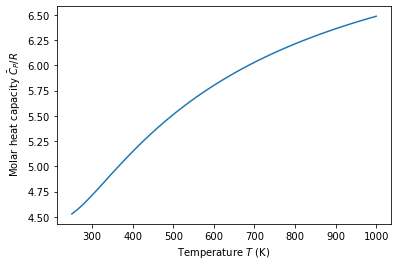

In [59]:
plt.plot(T10, cP_R10)
plt.xlabel("Temperature $T$ (K)")
plt.ylabel(" Molar heat capacity $\\bar{C}_P/R$ ")

Increasing because the vibrational modes are contributing more to the heat capacity. Recall for a diatomic IG at temperatures less than $\theta_\text{vib}$ we have $\bar{C}_P/R = 3.5$.

At normal temperatures, translations and rotations are contributing fully.

b) Using the table,
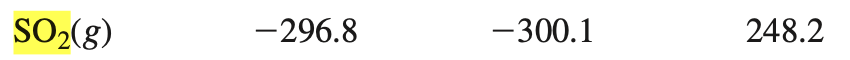

we find $S^\circ_{298} = $ 248.2 J/mol-K

c) First, we'll change temperature - this requires the same integral $\Delta S = \int C_P(T) dT/T$ that we did above.

In [61]:
DeltaS_1 = integrate.quad(lambda T: cPSO2(T)/T, 298, 1000)
DeltaS_1

(56.67339831165896, 3.4572037232611517e-09)

The pressure adjustment is the usual configurational entropy term from the equation sheet,

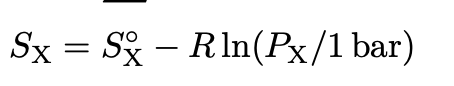

In [66]:
S0_1000 = 248.2+DeltaS_1[0]
Sfinal = S0_1000 - 8.3145*np.log(0.01)
print(f"{Sfinal=} J/mol-K")

Sfinal=343.1630858230569 J/mol-K


The final answer is 343.2 J/mol-K.